# Project Introduction: 
__Project Name: _Mortality Rate Trends with Race/Ethnicity___

The data being analyzed pertains to mortalities stratified by various attributes namely Date, Location, Geographic-Level, Gender, Ethnicity, etc. _(COVID-19, Heart, and Stroke data-sets)_

Question : _Is there a significant difference in mortalitiy rates by groups for race/ethnicity?_ 
## Any Changes:  

We have not made any significant changes that will potentially derail our approach to attain our goal ie. to bring awarness to healcare leaders/politicians by helping them establish new guidelines, attitudes, and policies using external resources to support our findings.

In [2]:
#Quiz Gods Link 
#https://github.com/uic-cs418/cs418-spring22-quiz-gods

### Cleaning Mortality Trend data ###
import pandas as pd
import numpy as np
import string
import seaborn as sns 
import matplotlib.pyplot as plt
from DFfunctions import *

covid = pd.read_csv('covid19mortality.csv')
heart = pd.read_csv('heartmortality.csv')   #Year for every data observation is 2013
stroke = pd.read_csv('strokemortality.csv') #Year for every data observation is 2017

#covid.head(2)

In [3]:
#Drop columns that are not necessary for analysis
covidNotUsed = ['Year', 'Footnote']
coviddf = removeC(covid, covidNotUsed)

heartNotUsed = ['Year','LocationDesc','GeographicLevel','DataSource','Class','Topic','Data_Value_Unit','Data_Value_Type',
                 'StratificationCategory1','Data_Value_Footnote_Symbol','StratificationCategory2',
                 'TopicID','LocationID','Location 1']

heartDf = removeC(heart, heartNotUsed)

strokeNotUsed = ['Year','LocationDesc','DataSource','Class','Topic','Data_Value_Unit','Data_Value_Type',
                 'StratificationCategory1','Data_Value_Footnote_Symbol','StratificationCategory2',
                 'TopicID','LocationID','Y_lat','X_lon','GeographicLevel']

strokeDf = removeC(stroke, strokeNotUsed)

In [5]:
#We want data analysis to be easy to process and less time to take, so let's clarify some column values and
#create a legend key to shorten the column values to look through the dataset
coviddf = coviddf.rename(columns = {'Non-Hispanic White':'W', 'Non-Hispanic Black or African American': 'B/AA',
                       'Non-Hispanic American Indian or Alaska Native':'AIAN', 'Non-Hispanic Asian':'A',
                        'Non-Hispanic Native Hawaiian or Other Pacific Islander': 'NH/OPI',
                        'Non Hispanic more than one race': 'MultipleRaces', 'Hispanic or Latino' : 'H/L'})

heartDf = heartDf.rename(columns = {'Data_Value': 'Deaths per 100,000', 'Data_Value_Footnote': 'Sufficiency?'
                               ,'Stratification1': 'Gender', 'Stratification2': 'Race/Ethnicity'})

strokeDf = strokeDf.rename(columns = {'Data_Value': 'Deaths per 100,000', 'Data_Value_Footnote': 'Sufficiency?'
                                 ,'Stratification1': 'Gender','Stratification2': 'Race/Ethnicity'})

heartDf.head(3)

,LocationAbbr,"Deaths per 100,000",Sufficiency?,Gender,Race/Ethnicity
0,AK,147.4,NaN,Overall,Overall
1,AK,229.4,NaN,Overall,Overall
2,AK,255.5,NaN,Overall,Overall


## **Exploratory Data Analysis**
#####  Explain what your data looks like (words are fine, butvisualizations are often better). Include any interesting issues or preliminaryconclusions you have about your data

In our project EDA is primarily used to:<br>
• Cleaning, we had many unused columns that did not contribute to our analysis. Hence, we only picked the ones that were core to our model (Race/Ethnicity, deaths, etc.).<br>
• Preliminary selection of appropriate models (in this case we are using a bar-plot)<br>
• Determining relationships among the explanatory variables, that here are Average Number of Deaths vs. Races <br>
• Assessing the direction and rough size of relationships between explanatory and outcome variables. <br>
• Assumptions from the dataset: White and African American descents have significantly higher deaths related to heart-conditions and strokes compared to other races. <br>

In [10]:
#Cleaning data to remove columns that does not have enough data 

#Filtering data to obtain overall results for gender and clear any insufficient data from our dataset
heartDf = getSufficientData(heartDf)
strokeDf = getSufficientData(strokeDf)

#removing columns for Sufficiency as we only care about the race, death, and gender

notWanted = ['Sufficiency', 'Sufficiency?']
heartUpdated = removeC(heartDf, notWanted)
heartUpdated.head()

strokeUpdated = removeC(strokeDf, notWanted)
strokeUpdated.head(3)

## Visualization
_Since the data is targeted to Health Care Leaders and Politicians, the aim of our visualization stands to test the hypothesis that different races have different death rates across COVID-19, Heart-conditions and Stroke related deaths. This stands interesting as it is quite helpful to our target audience for their usefulness in campaigns and providing resources to required population. As per this visualization a trend is seen that African American descents have the highest deaths related to heart-conditions and strokes._

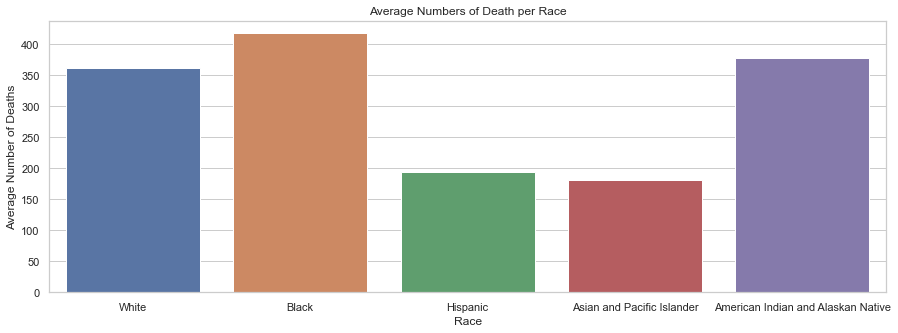

In [7]:
#Determining average deaths per each race group for heart related

heartUpdated2 = avgDf(heartUpdated)

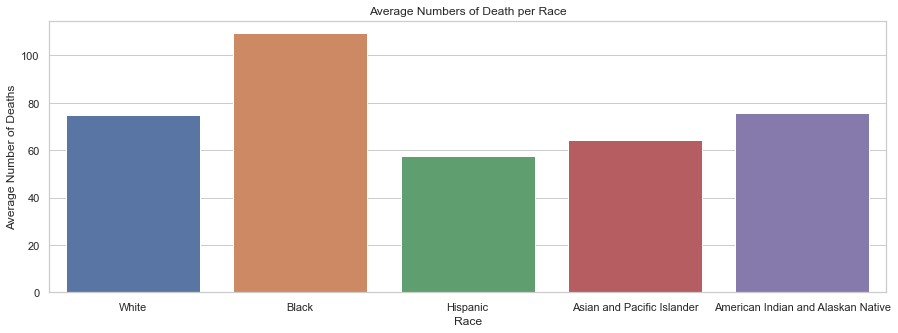

In [8]:
#Determining average deaths per each race group for stroke related

strokeUpdated2 = avgDf(strokeUpdated)

# **Reflection**
#### o What is hardest part of the project that you’ve encountered so far?
Applying and fitting a ML analysis that can assist in coming towards a conclusion on the hypothesis. Another interesting challenge has been pushing new code to the main branch as we have encountered numerous conflicts because of multiple group members working on the same notebook.
#### o What are your initial insights?
Initial observations lead to two inferences. The first inference is that the mortality trends are quite similar in both cases namely avg. number of deaths because of heart-conditions and strokes when the data is stratified according to "Races". The second inference is that the number of deaths by heart-conditions is significantly higher than that of deaths caused by stroke. This is likely because heart disease is the number one leading cause of death in the U.S., according to the CDC, and stroke is the 5th leading cause of death in the U.S.
#### o Are there any concrete results you can show at this point? If not, why not? 
There are two potential results that can be derived at this point. First one is Hispanic and Asian/Pacific Islander races have almost half average deaths from heart-conditions compared to other race groups. Secondly in the stroke data those of African American descent have a higher average number of deaths compared to the other race groups. But this second result needs more exploration in order to support the claim. An interesting point that we found is that Native Americans are disproportionately higher in heart disease deaths compared to stroke when comparing each race to each other? Why? With some research, we found a study called the Strong Heart Study that mentioned "diabetes, high blood pressure, high cholesterol, and cigarette smoking...have increased among American Indians because of cultural changes..." over the last 50 years
#### o Going forward, what are the current biggest problems you’re facing? 
The biggest challenge so far is finding a proper way to examine our covid dataset because the dates change with the data elements. Thankfully the data is organized so we don't have to aggregate the data for every race/ethnicity because it has already done that for us by mentioning the state as the United States, which means it's an overall statistic.
#### o Do you think you are on track with your project? If not, what parts do you need to dedicate more time to? 
We are on track with our project as we have seen some examples of variances in death rates between ethnicities. However, our approach needs to be trained more to have our data support each other.
#### o Given your initial exploration of the data, is it worth proceeding with your project, why? If not, how are you going to change your project and why do you think it’s better than your current results?
Yes our data is worth proceeding with as we have already found several interesting discoveries that support our initial hypothesis. We would like to dig deeper into our research and refine our analysis techniques to not only further support our initial discoveries, but possibly find new ones. Possible ways of doing this is to use different visualizations and bring in other data categories we had initially removed, such as gender and location. For example, splitting up the data by state and checking to see if certain ethnicities would be more vulnerable in specific states would be a further exploration goal of ours.

## Next Steps 
##### What you plan to accomplish in the next month and how you plan to evaluate whether your project achieved the goals you set for it.
Figure out how to use ML analysis effectively to complement and support our analysis and visualizations. If we can apply ML analysis to support out visualization then we will be confident that our project achieved its goals.